In [5]:
# Import necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import imblearn
import sklearn
pd.set_option('display.max_rows', 1000)

In [6]:
acci_strtindex = pd.read_csv('./data/bikecollisiondata_with_nearest_street_index2.csv',sep = ',')

In [7]:
# data clearning on speedlimit 
numeric_features = ['SEGLENGTH','SURFACEWID', 'PVMTCONDIN', 'PVMTCOND_1','SLOPE_PCT' ]
categorical_features = ['SPEEDLIMIT', 'ARTCLASS', 'SEGDIR', 'ONEWAY', 'SURFACETYP','NATIONHWYS' ,'PVMTCATEGO', 'PARKBOULEV' ,'TRANDESCRI']
#X = strt2[numeric_features + categorical_features ].copy()
#y = strt2['acc']

In [8]:
len(acci_strtindex)

5707

In [9]:
type(acci_strtindex['INCDATE'][0])

str

In [10]:
acci_strtindex['date'] = pd.to_datetime(acci_strtindex['INCDATE']).dt.date

In [11]:
pd.to_datetime(acci_strtindex['INCDTTM'])

0      2006-05-16 06:30:00
1      2007-02-27 10:40:00
2      2007-06-02 00:00:00
3      2008-08-05 00:00:00
4      2011-12-07 21:57:00
               ...        
5702   2019-07-10 10:21:00
5703   2019-07-13 16:36:00
5704   2019-06-01 19:56:00
5705   2019-06-29 17:21:00
5706   2019-04-26 16:42:00
Name: INCDTTM, Length: 5707, dtype: datetime64[ns]

In [12]:
acci_strtindex['time'] = pd.to_datetime(acci_strtindex['INCDTTM']).dt.time

In [13]:
acci_strtindex['year'] = pd.to_datetime(acci_strtindex['INCDTTM']).dt.year
acci_strtindex['year'].unique()

array([2006, 2007, 2008, 2011, 2012, 2009, 2013, 2010, 2014, 2016, 2015,
       2018, 2017, 2004, 2019, 2005])

In [14]:
acci_strtindex['hour'] = pd.to_datetime(acci_strtindex['INCDTTM']).dt.hour
acci_strtindex['hour'] = [np.nan if i == 0 else i for i in acci_strtindex['hour']]

In [15]:
acci_strtindex['dayofweek'] = pd.to_datetime(acci_strtindex['INCDATE']).dt.dayofweek

In [16]:
acci_strtindex['month'] = pd.to_datetime(acci_strtindex['INCDATE']).dt.month

In [17]:
acci_strtindex['weekday'] = [1 if i <= 4 else 0 for i in acci_strtindex['dayofweek']] # Monday is 0 Sunday is 6 
#weekday is 1 weekend is 0 

In [18]:
acci_strtindex['weekday'].sum()

4690

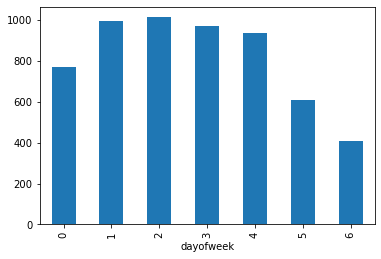

In [19]:
acci_strtindex.groupby('dayofweek').size().plot.bar()

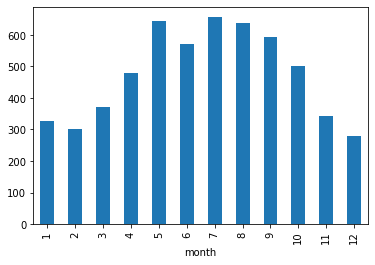

In [32]:
acci_strtindex.groupby('month').size().plot.bar()

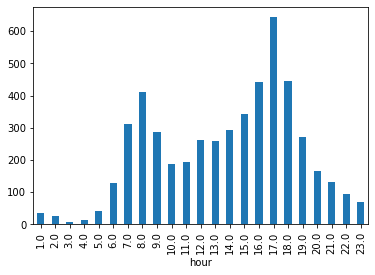

In [33]:
acci_strtindex.groupby('hour').size().plot.bar()

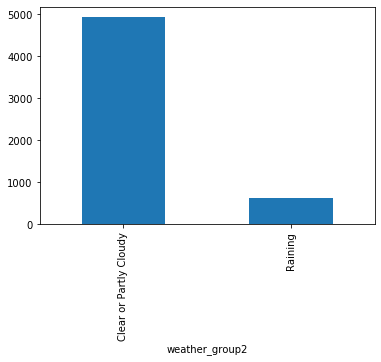

In [38]:
acci_strtindex.groupby('weather_group2').size().plot.bar()

In [34]:
acci_strtindex.groupby('weather_group').size()

weather_group
Clear or Partly Cloudy    4129
Overcast                   810
Raining                    631
dtype: int64

In [35]:
## further group by rain or not 
weather_group2 = np.empty(len(acci_strtindex), dtype = object)
for i in np.arange(0,len(acci_strtindex['weather_group'])):
        weather = acci_strtindex['weather_group'][i] 
        if ( weather == 'Overcast' ):
            weather_group2[i] = 'Clear or Partly Cloudy'
        else:
            weather_group2[i] = weather

In [36]:
acci_strtindex['weather_group2'] = weather_group2
acci_strtindex.groupby(['weather_group2']).size()

weather_group2
Clear or Partly Cloudy    4939
Raining                    631
dtype: int64

In [37]:
acci_strtindex['rushhour'] = [ 1 if ((i <=9) and (i >= 7)) or ((i>= 15) and (i <= 19)) else np.nan if np.isnan(i) == True else 0 for i in acci_strtindex['hour'] ]

In [ ]:
acci_strtindex.to_csv('./bikecollisiondata_with_nearest_street_index2_updated.csv', index=False,sep = ",")

## EDA on SlideWalk data 

In [ ]:
sidewalk = pd.read_csv('./data/Sidewalks.csv',sep = ',')

In [ ]:
sidewalk.columns

In [ ]:
sidewalk.isnull().sum()

In [ ]:
len(sidewalk)

In [ ]:
## EDA on Bike Facility 
facility = pd.read_csv('./data/Existing_Bike_Facilities.csv',sep = ',')

In [ ]:
facility.columns

In [ ]:
len(facility)

In [ ]:
facility.isnull().sum()

In [ ]:
pd.to_datetime(facility.DATE_COMPLETED)

In [ ]:
facility['yr_complete'] = pd.to_datetime(facility.DATE_COMPLETED).dt.year
#acci_strtindex['yr_complete'].unique()

In [ ]:
facility['yr_complete'].hist()

In [ ]:
facility.head()

In [4]:
# Merge bikelane info with street / accident

bikecl = pd.read_csv('./data/bikecollisiondata_with_nearest_street_index2_updated.csv', sep = ",")
str_bike = pd.read_csv('./data/strt2_withbikelane.csv', sep= ",")
bike = pd.read_csv('./data/Existing_Bike_Facilities.csv', sep= ",")

In [7]:
bikecl.groupby('ADDRTYPE').size()

ADDRTYPE
Alley              9
Block           2434
Intersection    3260
dtype: int64

In [13]:
bikecl.head()

,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNC,EXCEPTRSND,...,near_str_index,min_length,weather_group,date,time,hour,dayofweek,weekday,rushhour,weather_group2
0,1015,63600,63600,2188744,Matched,Intersection,35587.0,1ST AVE NW AND NW 143RD ST,NaN,NaN,...,2284.0,0.000000,Clear or Partly Cloudy,2006-05-16,06:30:00,6.0,1,1,0.0,Clear or Partly Cloudy
1,1031,76900,76900,2620912,Matched,Intersection,29072.0,BROADWAY AND E HOWELL ST,NaN,NaN,...,11910.0,0.000000,Clear or Partly Cloudy,2007-02-27,10:40:00,10.0,1,1,0.0,Clear or Partly Cloudy
2,1105,66700,66700,2806857,Matched,Intersection,38204.0,68TH AVE S AND RAINIER AVE S,NaN,NaN,...,3727.0,0.000000,Clear or Partly Cloudy,2007-06-02,00:00:00,NaN,5,0,NaN,Clear or Partly Cloudy
3,1219,82300,82300,2894257,Matched,Block,NaN,EAST MARGINAL WAY S BETWEEN S RIVER ST AND S B...,NaN,NaN,...,15724.0,0.000004,Clear or Partly Cloudy,2008-08-05,00:00:00,NaN,1,1,NaN,Clear or Partly Cloudy
4,1320,124600,124600,3562409,Matched,Intersection,26818.0,WOODLAND PARK AVE N AND N 43RD N ST,NaN,NaN,...,3839.0,0.000000,Clear or Partly Cloudy,2011-12-07,21:57:00,21.0,2,1,0.0,Clear or Partly Cloudy


In [12]:
bike['STREET_NAME']

0       S LANDER ST
1       S LANDER ST
2       S LANDER ST
3       S LANDER ST
4       S LANDER ST
           ...     
3248     NE 65TH ST
3249     NE 65TH ST
3250     NE 65TH ST
3251     NE 65TH ST
3252     NE 65TH ST
Name: STREET_NAME, Length: 3253, dtype: object

In [23]:
training = pd.read_csv('./data/training.csv', sep = ',')
label = pd.read_csv('./data/label.csv', sep = ',')
training['acc'] = label

In [20]:
training.columns

Index(['SEGLENGTH_log', 'SURFACEWID_log', 'PVMTCONDIN', 'PVMTCOND_1',
       'SLOPE_PCT', 'SW_WIDTH', 'FILLERWID', 'MINIMUMVARIABLEWIDTH',
       'PRIMARYCROSSSLOPE', 'LENGTH_MIL', 'SPEEDLIMIT', 'SEGDIR', 'STREETTYPE',
       'ONEWAY', 'SURFACETYP', 'PVMTCATEGO', 'CONDITION', 'SWINCOMPLETEYN',
       'simulate_rushhour', 'simulate_weather', 'simulate_weekday',
       'EXISTING_FACILITY_TYPE', 'CLASS_DESC', 'GEN_ALIAS'],
      dtype='object')

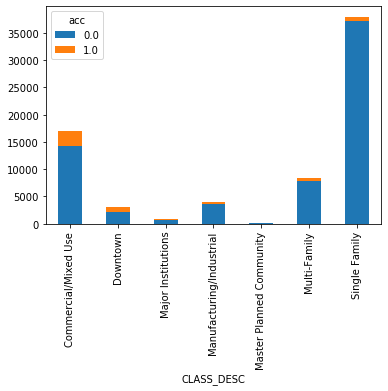

In [27]:
training.groupby([ 'CLASS_DESC', 'acc']).size().unstack().plot(kind='bar', stacked=True)

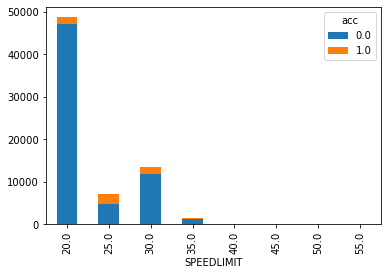

In [30]:
training.groupby([ 'SPEEDLIMIT', 'acc']).size().unstack().plot(kind='bar', stacked=True)

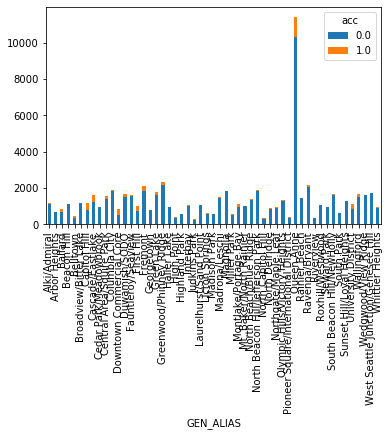

In [28]:
training.groupby([ 'CLASS_DESC', 'acc']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
training.groupby('CLASS_DESC').size().plot.bar()

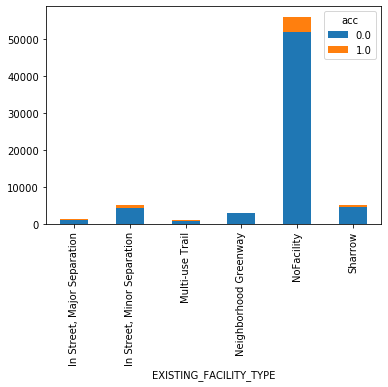

In [31]:
training.groupby([ 'EXISTING_FACILITY_TYPE', 'acc']).size().unstack().plot(kind='bar', stacked=True)

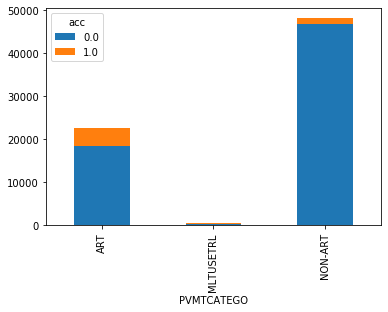

In [32]:
training.groupby([ 'PVMTCATEGO', 'acc']).size().unstack().plot(kind='bar', stacked=True)

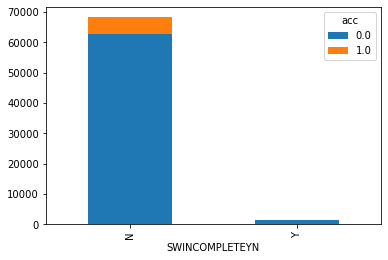

In [33]:

training.groupby([ 'SWINCOMPLETEYN', 'acc']).size().unstack().plot(kind='bar', stacked=True)


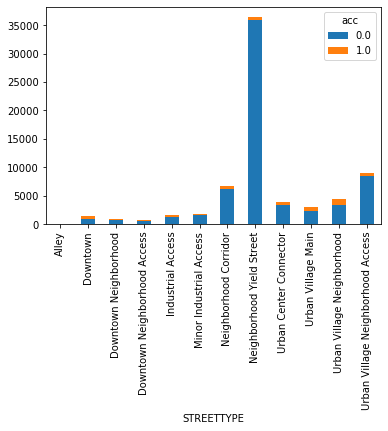

In [34]:


training.groupby([ 'STREETTYPE', 'acc']).size().unstack().plot(kind='bar', stacked=True)


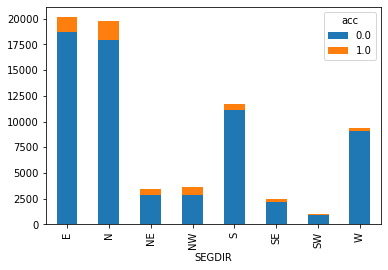

In [35]:



training.groupby([ 'SEGDIR', 'acc']).size().unstack().plot(kind='bar', stacked=True)

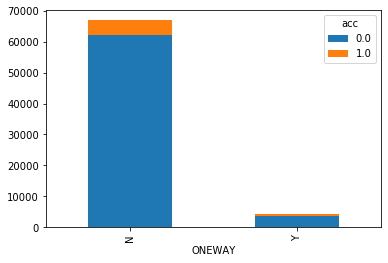

In [36]:
training.groupby([ 'ONEWAY', 'acc']).size().unstack().plot(kind='bar', stacked=True)

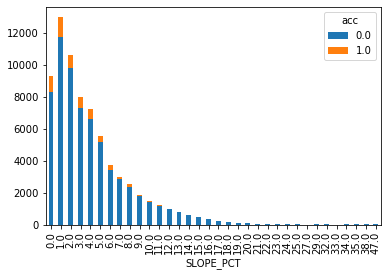

In [37]:


training.groupby([ 'SLOPE_PCT' , 'acc']).size().unstack().plot(kind='bar', stacked=True)